In [ ]:
!pip install pandas_ta
!pip install mysql-connector-python


import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px

import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
import numpy as np
import datetime
import mysql.connector
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')
from functools import lru_cache

In [ ]:
!pip install TA-Lib

In [4]:
import mysql.connector
import pandas as pd

def data():
    mydb = mysql.connector.connect(
        host="xxx",
        user="xxx",
        password="xxx",
        database="xxx",
        port = xxx)

    # สร้าง cursor เพื่อใช้ในการ execute คำสั่ง SQL
    mycursor = mydb.cursor()

    # คำสั่ง SQL ที่ต้องการ execute
    query = f"""
    SELECT Time,Open,High,Low,Close,StockList As Symbol,Exchange
    From stock_hloc
    where TimeFrame = '5M' and StockList = 'S50'
    AND (TIME(TIME) BETWEEN '10:00:00' AND '12:30:00'
    OR TIME(TIME) BETWEEN '14:30:00' AND '16:45:00')
    ;"""

    # execute คำสั่ง SQL
    mycursor.execute(query)

    # อ่านผลลัพธ์จากคำสั่ง SQL
    myresult = mycursor.fetchall()

    # ปิด cursor
    mycursor.close()

    # รับชื่อคอลัมน์ของผลลัพธ์จากคำสั่ง SQL
    column_names = [desc[0] for desc in mycursor.description]

    # สร้าง DataFrame โดยใช้ผลลัพธ์ที่ได้จากการ query และตั้งชื่อคอลัมน์ตาม column_names
    df = pd.DataFrame(myresult, columns=column_names)
    df.set_index('Time', inplace=True)

    return df

df = data()
df

,Open,High,Low,Close,Symbol,Exchange
Time,,,,,,
2023-05-08 10:00:00,933.50,935.00,933.30,933.70,S50,TFEX
2023-05-08 10:05:00,933.80,934.20,932.50,932.70,S50,TFEX
2023-05-08 10:10:00,932.70,932.90,931.90,932.30,S50,TFEX
2023-05-08 10:15:00,932.50,933.40,931.90,933.20,S50,TFEX
2023-05-08 10:20:00,933.40,934.40,932.90,933.40,S50,TFEX
...,...,...,...,...,...,...
2024-03-06 16:25:00,835.50,835.60,835.20,835.40,S50,TFEX
2024-03-06 16:30:00,835.50,835.50,835.10,835.20,S50,TFEX
2024-03-06 16:35:00,835.20,835.40,834.70,834.80,S50,TFEX


In [ ]:
# Calculate Indicator


### 1.   SMA(50)
### 2.   CCI(20)
### 3.   Max(hight) 3 แท่งเทียน(ก่อนหน้า)


In [14]:
import pandas as pd
import talib
#ใช้ tulib  คือไลบรารีซอฟต์แวร์ที่ใช้ในการทำการวิเคราะห์ทางเทคนิค (Technical Analysis) ในตลาดทางการเงิน

def cal_indy():
    df = data().copy()
    df['SMA'] = talib.SMA(df['Close'], timeperiod=50)
    df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=20)
    df['Max(Hight)3cd'] = df['High'].shift(1).rolling(window=3).max()
    return df


df = cal_indy()
df

,Open,High,Low,Close,Symbol,Exchange,SMA,CCI,Max(Hight)3cd
Time,,,,,,,,,
2023-05-08 10:00:00,933.50,935.00,933.30,933.70,S50,TFEX,NaN,NaN,NaN
2023-05-08 10:05:00,933.80,934.20,932.50,932.70,S50,TFEX,NaN,NaN,NaN
2023-05-08 10:10:00,932.70,932.90,931.90,932.30,S50,TFEX,NaN,NaN,NaN
2023-05-08 10:15:00,932.50,933.40,931.90,933.20,S50,TFEX,NaN,NaN,935.00
2023-05-08 10:20:00,933.40,934.40,932.90,933.40,S50,TFEX,NaN,NaN,934.20
...,...,...,...,...,...,...,...,...,...
2024-03-06 16:25:00,835.50,835.60,835.20,835.40,S50,TFEX,834.96,-58.50,836.10
2024-03-06 16:30:00,835.50,835.50,835.10,835.20,S50,TFEX,835.07,-77.94,836.00
2024-03-06 16:35:00,835.20,835.40,834.70,834.80,S50,TFEX,835.12,-120.44,835.90


In [ ]:
# Condition เปิด long ,เปิด short

#เปิด long
#1.   Close(M5) > SMA50
#2.   CCI>150
#3.   Close(M5) >  hight 3 แท่งเทียน(ก่อนหน้า)

#เปิด short
#1.   Close(M5) < SMA50
#2.   CCI<150
#3.   Close(M5) <  hight 3 แท่งเทียน(ก่อนหน้า)


In [15]:
def position():
    df = cal_indy().copy()
    df.dropna(inplace=True)
    #df.reset_index(inplace=True)
    df['Position'] = ''
    po = '-'
    #po คือ '-' (ไม่มีการสั่งซื้อเกิดขึ้น)

    for t in range (len(df)):
        close = df.loc[df.index[t],'Close']
        sma = df.loc[df.index[t],'SMA']
        cci = df.loc[df.index[t],'CCI']
        hight = df.loc[df.index[t],'Max(Hight)3cd']


        #long position
        if (po == '-' or po == 'short') and close > sma and cci > 150 and close > hight:
            po = 'long'
            df.loc[df.index[t],'Position'] = 'Long'

        elif (po == '-' or po == 'long') and close < sma and cci < 150 and close < hight:
            po = 'short'
            df.loc[df.index[t],'Position'] = 'Short'



    df['Position'] = df['Position'].shift(1)
    df.dropna(inplace=True)
    df = df.loc[df.Position != '']
    return df

df = position()
df

,Open,High,Low,Close,Symbol,Exchange,SMA,CCI,Max(Hight)3cd,Position
Time,,,,,,,,,,
2023-05-09 11:20:00,950.20,952.00,950.20,951.50,S50,TFEX,946.01,244.91,950.50,Long
2023-05-09 12:00:00,947.20,947.60,946.50,947.30,S50,TFEX,947.58,-69.68,950.30,Short
2023-05-09 16:35:00,947.90,948.00,947.50,947.90,S50,TFEX,947.31,190.18,948.70,Long
2023-05-10 10:05:00,945.60,945.70,944.40,944.80,S50,TFEX,947.28,-139.43,948.90,Short
2023-05-10 10:55:00,949.60,950.20,948.70,950.00,S50,TFEX,946.75,158.17,949.70,Long
...,...,...,...,...,...,...,...,...,...,...
2024-03-01 15:05:00,832.50,833.00,832.40,832.70,S50,TFEX,832.55,64.69,833.90,Short
2024-03-05 15:00:00,826.80,827.40,826.40,826.50,S50,TFEX,825.94,177.72,827.70,Long
2024-03-05 15:15:00,825.70,826.00,825.40,825.90,S50,TFEX,825.65,58.55,827.40,Short


In [ ]:
# Backtest

In [16]:
multiplier = 200
im = 30_000

In [17]:
def backtest():
    df2 = position().copy()

    #P/L (กำไร/ขาดทุน)
    df2['P/L'] = np.where((df2['Position']=='Long')&(df2['Position'].shift(1)=='Short'),-df2['Open']+df2['Open'].shift(1),
                    np.where((df2['Position']=='Short')&(df2['Position'].shift(1)=='Long'),df2['Open']-df2['Open'].shift(1),
                            pd.NA))

    df2['% P/L'] = np.where((df2['Position']=='Long')&(df2['Position'].shift(1)=='Short'),(-df2['Open']+df2['Open'].shift(1))/df2['Open'].shift(1),
                    np.where((df2['Position']=='Short')&(df2['Position'].shift(1)=='Long'),(df2['Open']-df2['Open'].shift(1))/df2['Open'].shift(1),
                            pd.NA))


    #เปิด Long แล้วปิดผลตอบแทนที่ได้จะเท่ากับ ราคาที่ปิดสถานะ - ราคาที่เปิดสถานะ
    #เปิด Short แล้วปิดผลตอบแทนที่ได้จะเท่ากับ ราคาที่เปิดสถานะ -  ราคาที่ปิดสถานะ


    #equity
    start = 300000
    df2['Contract'] = np.nan
    df2['P/L (THB)'] = np.nan
    df2['Equity'] = np.nan
    df2['no.trade'] = np.nan


    df2.loc[df2.index[0],'Equity'] = start
    df2.loc[df2.index[0],'no.trade'] = 0

    for t in range (1,len(df2)):
        pl = df2.loc[df2.index[t],'P/L']

        if not pd.isna(pl):

            con = np.floor(df2.loc[df2.index[t-1],'Equity']/im)
            #con = np.where((product=='gold')&(con>10),10,
            #               np.where(con>100,100,con))
            df2.loc[df2.index[t],'Contract'] =  int(con)
            pl_thb = con * df2.loc[df2.index[t],'P/L'] * multiplier
            pl_thb = np.where(pl_thb<0, pl_thb * (1+(0.107/100)),pl_thb * (1-(0.107/100)))
            # หาก pl_thb เป็นค่าลบ (ขาดทุน), โค้ดจะเพิ่มค่าขึ้นตามอัตรา 0.107% (อาจเป็นการเรียกเก็บภาษีหรือค่าคอมมิชชั่น). ถ้า pl_thb เป็นค่าบวก (กำไร), โค้ดจะหักลบออกตามอัตราเดียวกัน. นี่อาจสะท้อนถึงการปรับค่าของผลกำไรหรือขาดทุนเพื่อสะท้อนถึงค่าใช้จ่ายจริงหรือภาษีที่ต้องชำระ
            df2.loc[df2.index[t],'P/L (THB)'] = pl_thb

            #Equity
            df2.loc[df2.index[t],'Equity'] = df2.loc[df2.index[t-1],'Equity']+df2.loc[df2.index[t],'P/L (THB)']

            #no.trade
            df2.loc[df2.index[t],'no.trade'] = df2.loc[df2.index[t-1],'no.trade']+1

        else:

            df2.loc[df2.index[t],'Equity'] = df2.loc[df2.index[t-1],'Equity']
            df2.loc[df2.index[t],'no.trade'] = df2.loc[df2.index[t-1],'no.trade']

    return df2




    #df2['P/L(THB)'] = df2['P/L'] * multiplier
    #df2['Accumulate Return'] = df2['P/L(THB)'].cumsum()







df2 = backtest()
df2

,Open,High,Low,Close,Symbol,Exchange,SMA,CCI,Max(Hight)3cd,Position,P/L,% P/L,Contract,P/L (THB),Equity,no.trade
Time,,,,,,,,,,,,,,,,
2023-05-09 11:20:00,950.20,952.00,950.20,951.50,S50,TFEX,946.01,244.91,950.50,Long,<NA>,<NA>,NaN,NaN,"300,000.00",0.00
2023-05-09 12:00:00,947.20,947.60,946.50,947.30,S50,TFEX,947.58,-69.68,950.30,Short,-3.00,-0.00,10.00,"-6,006.42","293,993.58",1.00
2023-05-09 16:35:00,947.90,948.00,947.50,947.90,S50,TFEX,947.31,190.18,948.70,Long,-0.70,-0.00,9.00,"-1,261.35","292,732.23",2.00
2023-05-10 10:05:00,945.60,945.70,944.40,944.80,S50,TFEX,947.28,-139.43,948.90,Short,-2.30,-0.00,9.00,"-4,144.43","288,587.80",3.00
2023-05-10 10:55:00,949.60,950.20,948.70,950.00,S50,TFEX,946.75,158.17,949.70,Long,-4.00,-0.00,9.00,"-7,207.70","281,380.10",4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01 15:05:00,832.50,833.00,832.40,832.70,S50,TFEX,832.55,64.69,833.90,Short,-1.90,-0.00,6.00,"-2,282.44","201,139.82",267.00
2024-03-05 15:00:00,826.80,827.40,826.40,826.50,S50,TFEX,825.94,177.72,827.70,Long,5.70,0.01,6.00,"6,832.68","207,972.50",268.00
2024-03-05 15:15:00,825.70,826.00,825.40,825.90,S50,TFEX,825.65,58.55,827.40,Short,-1.10,-0.00,6.00,"-1,321.41","206,651.09",269.00


In [18]:
def summary(): #input == line chart or candle

    df3 = df2.copy()
    df3['Date'] = list(df3.index)


    ##########

    df4 = pd.DataFrame(columns=['Date','Equity','Drawdown (%)','P/L (THB)','% P/L','Cont Profit','Cont Loss']
                       ,index=df3.groupby('no.trade').first().index)
    df4['Date'] = df3.groupby('no.trade').first()['Date']
    df4['Equity'] = df3.groupby('no.trade').first()['Equity']
    df4['P/L (THB)'] = df3.groupby('no.trade').first()['P/L (THB)']
    df4['% P/L'] = df3.groupby('no.trade').first()['% P/L']
    df4['Drawdown (%)'] = abs((df4['Equity']-df4['Equity'].cummax())/df4['Equity'].cummax())

    df4['Cont Profit'] = 0
    df4['Cont Loss'] = 0

    for i in range (1,len(df4.index)):
        if df4.iloc[i]['P/L (THB)']<0:
            df4['Cont Loss'][i] = df4.iloc[i-1]['Cont Loss']+1
        if df4.iloc[i]['P/L (THB)']>0:
            df4['Cont Profit'][i] = df4.iloc[i-1]['Cont Profit']+1

    return df4

summary()

,Date,Equity,Drawdown (%),P/L (THB),% P/L,Cont Profit,Cont Loss
no.trade,,,,,,,
0.00,2023-05-09 11:20:00,"300,000.00",0.00,NaN,None,0,0
1.00,2023-05-09 12:00:00,"293,993.58",0.02,"-6,006.42",-0.00,0,1
2.00,2023-05-09 16:35:00,"292,732.23",0.02,"-1,261.35",-0.00,0,2
3.00,2023-05-10 10:05:00,"288,587.80",0.04,"-4,144.43",-0.00,0,3
4.00,2023-05-10 10:55:00,"281,380.10",0.06,"-7,207.70",-0.00,0,4
...,...,...,...,...,...,...,...
267.00,2024-03-01 15:05:00,"201,139.82",0.35,"-2,282.44",-0.00,0,3
268.00,2024-03-05 15:00:00,"207,972.50",0.32,"6,832.68",0.01,1,0
269.00,2024-03-05 15:15:00,"206,651.09",0.33,"-1,321.41",-0.00,0,1


In [19]:
def summary2(df):
    df4 = summary().copy()
    df5 = pd.DataFrame(columns=['Equity','Return','Maximum Drawdown','number of trade'])
    df5 = pd.DataFrame(columns=['Total P/L','% Total P/L','AVG P/L','# trade','Sum Profit','Sum Loss',
                               'Max Profit','Max Loss','# Profit','# Loss','AVG Profit','AVG Loss',
                               '% Win','% Loss','# max cont profit','#max cont loss','Maximum Drawdown'])

    totalpl = df4['P/L (THB)'].sum()
    totalplpercent = totalpl/300000
    avgpl = df4['P/L (THB)'].mean()
    numtrade = len(df4.index)-1
    sumprofit = sum([df4.iloc[i]['P/L (THB)'] for i in range (len(df4.index)) if df4.iloc[i]['P/L (THB)']>0])
    sumloss = sum([df4.iloc[i]['P/L (THB)'] for i in range (len(df4.index)) if df4.iloc[i]['P/L (THB)']<0])
    maxprofit = df4['P/L (THB)'].max()
    maxloss = df4['P/L (THB)'].min()
    numprofit = len([df4.iloc[i]['P/L (THB)'] for i in range (len(df4.index)) if df4.iloc[i]['P/L (THB)']>0])
    numloss = len([df4.iloc[i]['P/L (THB)'] for i in range (len(df4.index)) if df4.iloc[i]['P/L (THB)']<0])
    avgprofit = np.average([df4.iloc[i]['P/L (THB)'] for i in range (len(df4.index)) if df4.iloc[i]['P/L (THB)']>0])
    avgloss = np.average([df4.iloc[i]['P/L (THB)'] for i in range (len(df4.index)) if df4.iloc[i]['P/L (THB)']<0])
    if numtrade != 0:
        win = numprofit/numtrade
        loss = numloss/numtrade
    else:
        win = 0; loss = 0
    maxcontprofit = df4['Cont Profit'].max()
    maxcontloss = df4['Cont Loss'].max()
    maxdd = df4['Drawdown (%)'].max()

    df5.loc[0] = [totalpl,totalplpercent,avgpl,numtrade,sumprofit,sumloss,maxprofit,maxloss,
                      numprofit,numloss,avgprofit,avgloss,win,loss,maxcontprofit,maxcontloss,maxdd]
    return df5

summary2(df)

,Total P/L,% Total P/L,AVG P/L,# trade,Sum Profit,Sum Loss,Max Profit,Max Loss,# Profit,# Loss,AVG Profit,AVG Loss,% Win,% Loss,# max cont profit,#max cont loss,Maximum Drawdown
0,"-87,000.60",-0.29,-321.04,271.00,"667,105.43","-754,106.03","61,374.26","-20,902.34",81.00,187.00,"8,235.87","-4,032.65",0.30,0.69,3.00,13.00,0.45


In [20]:
data()

,Open,High,Low,Close,Symbol,Exchange
Time,,,,,,
2023-05-08 10:00:00,933.50,935.00,933.30,933.70,S50,TFEX
2023-05-08 10:05:00,933.80,934.20,932.50,932.70,S50,TFEX
2023-05-08 10:10:00,932.70,932.90,931.90,932.30,S50,TFEX
2023-05-08 10:15:00,932.50,933.40,931.90,933.20,S50,TFEX
2023-05-08 10:20:00,933.40,934.40,932.90,933.40,S50,TFEX
...,...,...,...,...,...,...
2024-03-06 16:25:00,835.50,835.60,835.20,835.40,S50,TFEX
2024-03-06 16:30:00,835.50,835.50,835.10,835.20,S50,TFEX
2024-03-06 16:35:00,835.20,835.40,834.70,834.80,S50,TFEX


In [21]:
def timecolumn():
    dft = data().copy()
    # กำหนดคอลัมน์ 'time' เป็น index
    df.reset_index(inplace=True)

    return dft
timecolumn()

,Open,High,Low,Close,Symbol,Exchange
Time,,,,,,
2023-05-08 10:00:00,933.50,935.00,933.30,933.70,S50,TFEX
2023-05-08 10:05:00,933.80,934.20,932.50,932.70,S50,TFEX
2023-05-08 10:10:00,932.70,932.90,931.90,932.30,S50,TFEX
2023-05-08 10:15:00,932.50,933.40,931.90,933.20,S50,TFEX
2023-05-08 10:20:00,933.40,934.40,932.90,933.40,S50,TFEX
...,...,...,...,...,...,...
2024-03-06 16:25:00,835.50,835.60,835.20,835.40,S50,TFEX
2024-03-06 16:30:00,835.50,835.50,835.10,835.20,S50,TFEX
2024-03-06 16:35:00,835.20,835.40,834.70,834.80,S50,TFEX


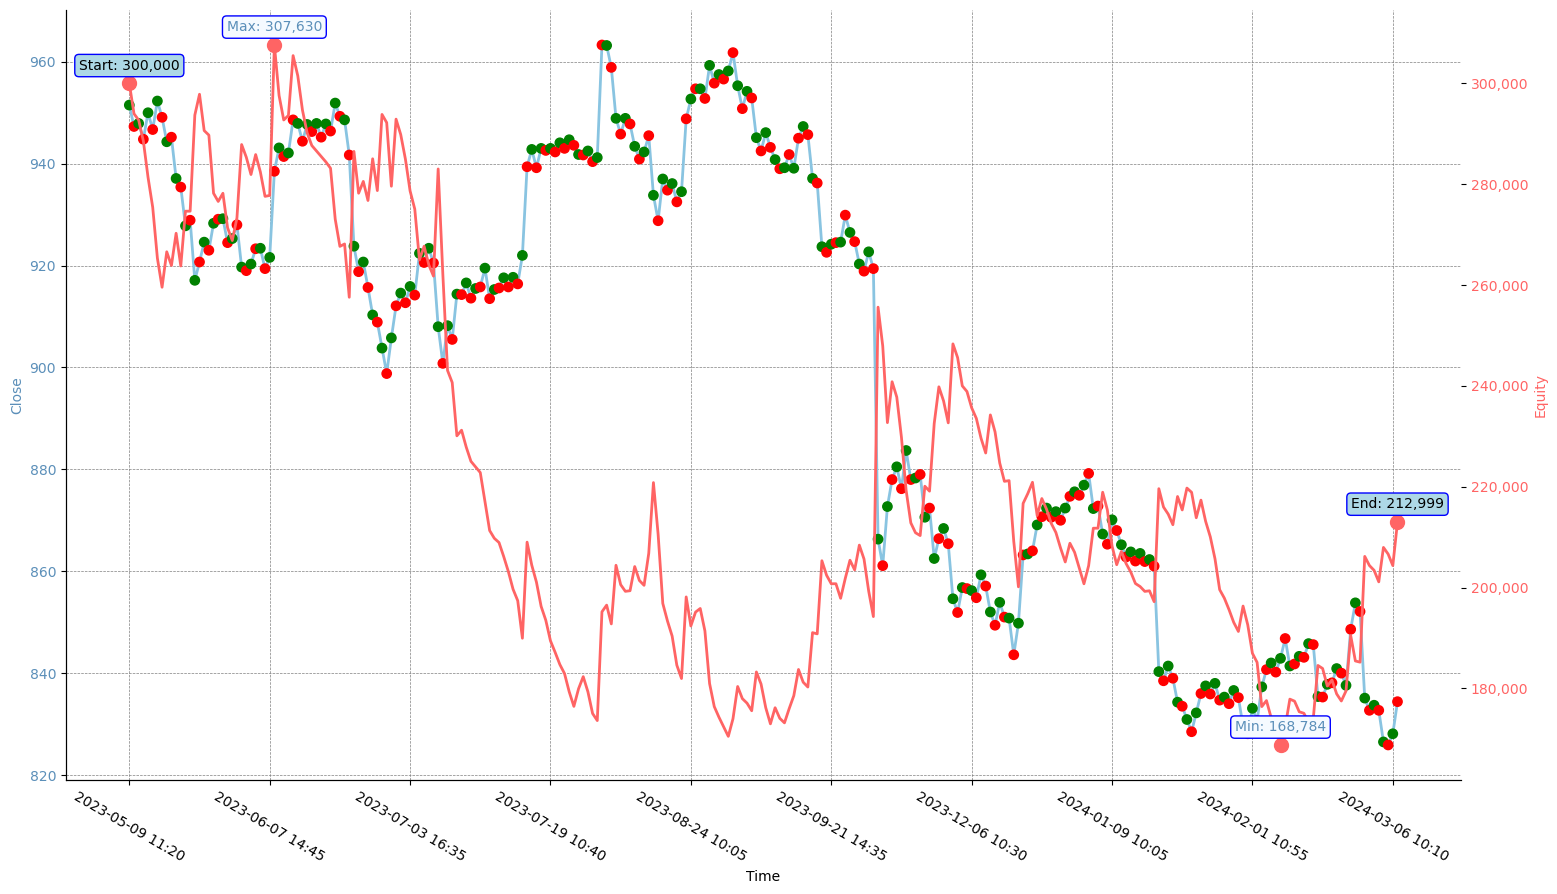

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
import datetime
import mysql.connector

import warnings
warnings.filterwarnings('ignore')


def to_plot():

    df2 = backtest().copy()

    # Format datetime index
    df2.index = df2.index.strftime('%Y-%m-%d %H:%M')

    fig, ax1 = plt.subplots(figsize=(18, 10))
    ax2 = ax1.twinx()

    # Plot Close on the left y-axis (ax1) with color
    ax1.plot(df2.index, df2['Close'], linestyle='-', color='#89C4E1', label='Close', linewidth=2)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Close', color='#5B8FB9')
    ax1.tick_params(axis='y', labelcolor='#5B8FB9')
    # Create a list of alternating colors (green and red)
    colors = ['green' if i % 2 == 0 else 'red' for i in range(len(df2))]

    # Scatter plot for points on the "Close" graph with alternating colors
    ax1.scatter(df2.index, df2['Close'], color=colors, marker='o', s=45, label='Close Points', zorder=5)




    # Drop NaN values in the 'Equity' column
    df2 = df2.dropna(subset=['Equity'])

    # Plot Equity on the right y-axis (ax2) with color
    ax2.plot(df2.index, df2['Equity'], linestyle='-', color='#FF6464', label='Equity', linewidth=2)
    ax2.set_ylabel('Equity', color='#FF6464')
    ax2.tick_params(axis='y', labelcolor='#FF6464')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.tick_params(axis='x', rotation=-30)

    # Calculate start, max, min, and end values
    start_value = df2['Equity'].iloc[0]
    end_value = df2['Equity'].iloc[-1]
    min_value = df2['Equity'].min()
    max_value = df2['Equity'].max()
    min_index = df2['Equity'].idxmin()
    max_index = df2['Equity'].idxmax()

    # Annotate points with start, max, min, and end values
    ax2.annotate(f'Start: {start_value:,.0f}', (df2.index[0], start_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="blue", facecolor="lightblue"))
    ax2.annotate(f'End: {end_value:,.0f}', (df2.index[-1], end_value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="blue", facecolor="lightblue"))

    # Scatter plot for start and end values
    ax2.scatter([df2.index[0], df2.index[-1]], [start_value, end_value], color='#FF6464', marker='o', s=100, label='Start/End Points')

    # Plot min and max points
    ax2.scatter([min_index, max_index], [min_value, max_value], color='#FF6464', marker='o', s=100)
    ax2.annotate(f'Min: {min_value:,.0f}', (min_index, min_value), textcoords="offset points", xytext=(0, 10), ha='center', color='#5B8FB9', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="blue", facecolor="#f5faff"))
    ax2.annotate(f'Max: {max_value:,.0f}', (max_index, max_value), textcoords="offset points", xytext=(0, 10), ha='center', color='#5B8FB9', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="blue", facecolor="#f5faff"))

    # Remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x)))
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x)))

    # Add gridlines
    ax1.grid(color='gray', linestyle='--', linewidth=0.5)

    # Rotate x-axis labels
    for tick in ax1.get_xticklabels():
        tick.set_rotation(-30)




    # Show the plot
    plt.show()

to_plot()


In [23]:
backtest()

,Open,High,Low,Close,Symbol,Exchange,SMA,CCI,Max(Hight)3cd,Position,P/L,% P/L,Contract,P/L (THB),Equity,no.trade
Time,,,,,,,,,,,,,,,,
2023-05-09 11:20:00,950.20,952.00,950.20,951.50,S50,TFEX,946.01,244.91,950.50,Long,<NA>,<NA>,NaN,NaN,"300,000.00",0.00
2023-05-09 12:00:00,947.20,947.60,946.50,947.30,S50,TFEX,947.58,-69.68,950.30,Short,-3.00,-0.00,10.00,"-6,006.42","293,993.58",1.00
2023-05-09 16:35:00,947.90,948.00,947.50,947.90,S50,TFEX,947.31,190.18,948.70,Long,-0.70,-0.00,9.00,"-1,261.35","292,732.23",2.00
2023-05-10 10:05:00,945.60,945.70,944.40,944.80,S50,TFEX,947.28,-139.43,948.90,Short,-2.30,-0.00,9.00,"-4,144.43","288,587.80",3.00
2023-05-10 10:55:00,949.60,950.20,948.70,950.00,S50,TFEX,946.75,158.17,949.70,Long,-4.00,-0.00,9.00,"-7,207.70","281,380.10",4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01 15:05:00,832.50,833.00,832.40,832.70,S50,TFEX,832.55,64.69,833.90,Short,-1.90,-0.00,6.00,"-2,282.44","201,139.82",267.00
2024-03-05 15:00:00,826.80,827.40,826.40,826.50,S50,TFEX,825.94,177.72,827.70,Long,5.70,0.01,6.00,"6,832.68","207,972.50",268.00
2024-03-05 15:15:00,825.70,826.00,825.40,825.90,S50,TFEX,825.65,58.55,827.40,Short,-1.10,-0.00,6.00,"-1,321.41","206,651.09",269.00
